<a href="https://colab.research.google.com/github/poppynikou/QMS_SaMD_Template/blob/main/QMS_runthrough_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC Summer School Day 2

We will work through the following software design stages:

1. Proposal and project intiation
2. Gathering requirements
3. Create a Design Specification
4. Verification of a software function
5. Validation of a requirement


In [ ]:
# Upload Data
from google.colab import files
uploaded = files.upload()

In [ ]:
! unzip day2_data.zip

Archive:  day2_data.zip
   creating: day2_data/
  inflating: day2_data/requirements.txt  
   creating: day2_data/images/
  inflating: day2_data/Makefile      
   creating: day2_data/test_data/
  inflating: day2_data/config.yml    
   creating: day2_data/documents/
   creating: day2_data/data/
  inflating: day2_data/images/lifecycle-processes.png  
  inflating: day2_data/images/care_process_diagram.png  
   creating: day2_data/images/uimockups/
  inflating: day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes.csv  
  inflating: day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes changed columns.csv  
  inflating: day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes.xlsx  
  inflating: day2_data/documents/hazard-log.md  
  inflating: day2_data/documents/medical-device-regulations-classification.md  
  inflating: day2_data/documents/verification-and-validation-plan.md  
  inflating: day2_data/documents/cyber-security.md  
  inflating: day2_data/documents/.DS_St

In [ ]:
! pip install -r day2_data/requirements.txt

# Import python packages
import os
from zipfile import ZipFile
import yaml
import pandas as pd
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pytest
import ipytest

class MyDumper(yaml.Dumper):

    def increase_indent(self, flow=False, indentless=False):
        return super(MyDumper, self).increase_indent(flow, False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.6/226.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00


## Care Process Diagram

Assess the care process diagram for the Diabetes app and how it integrates into a hospital.

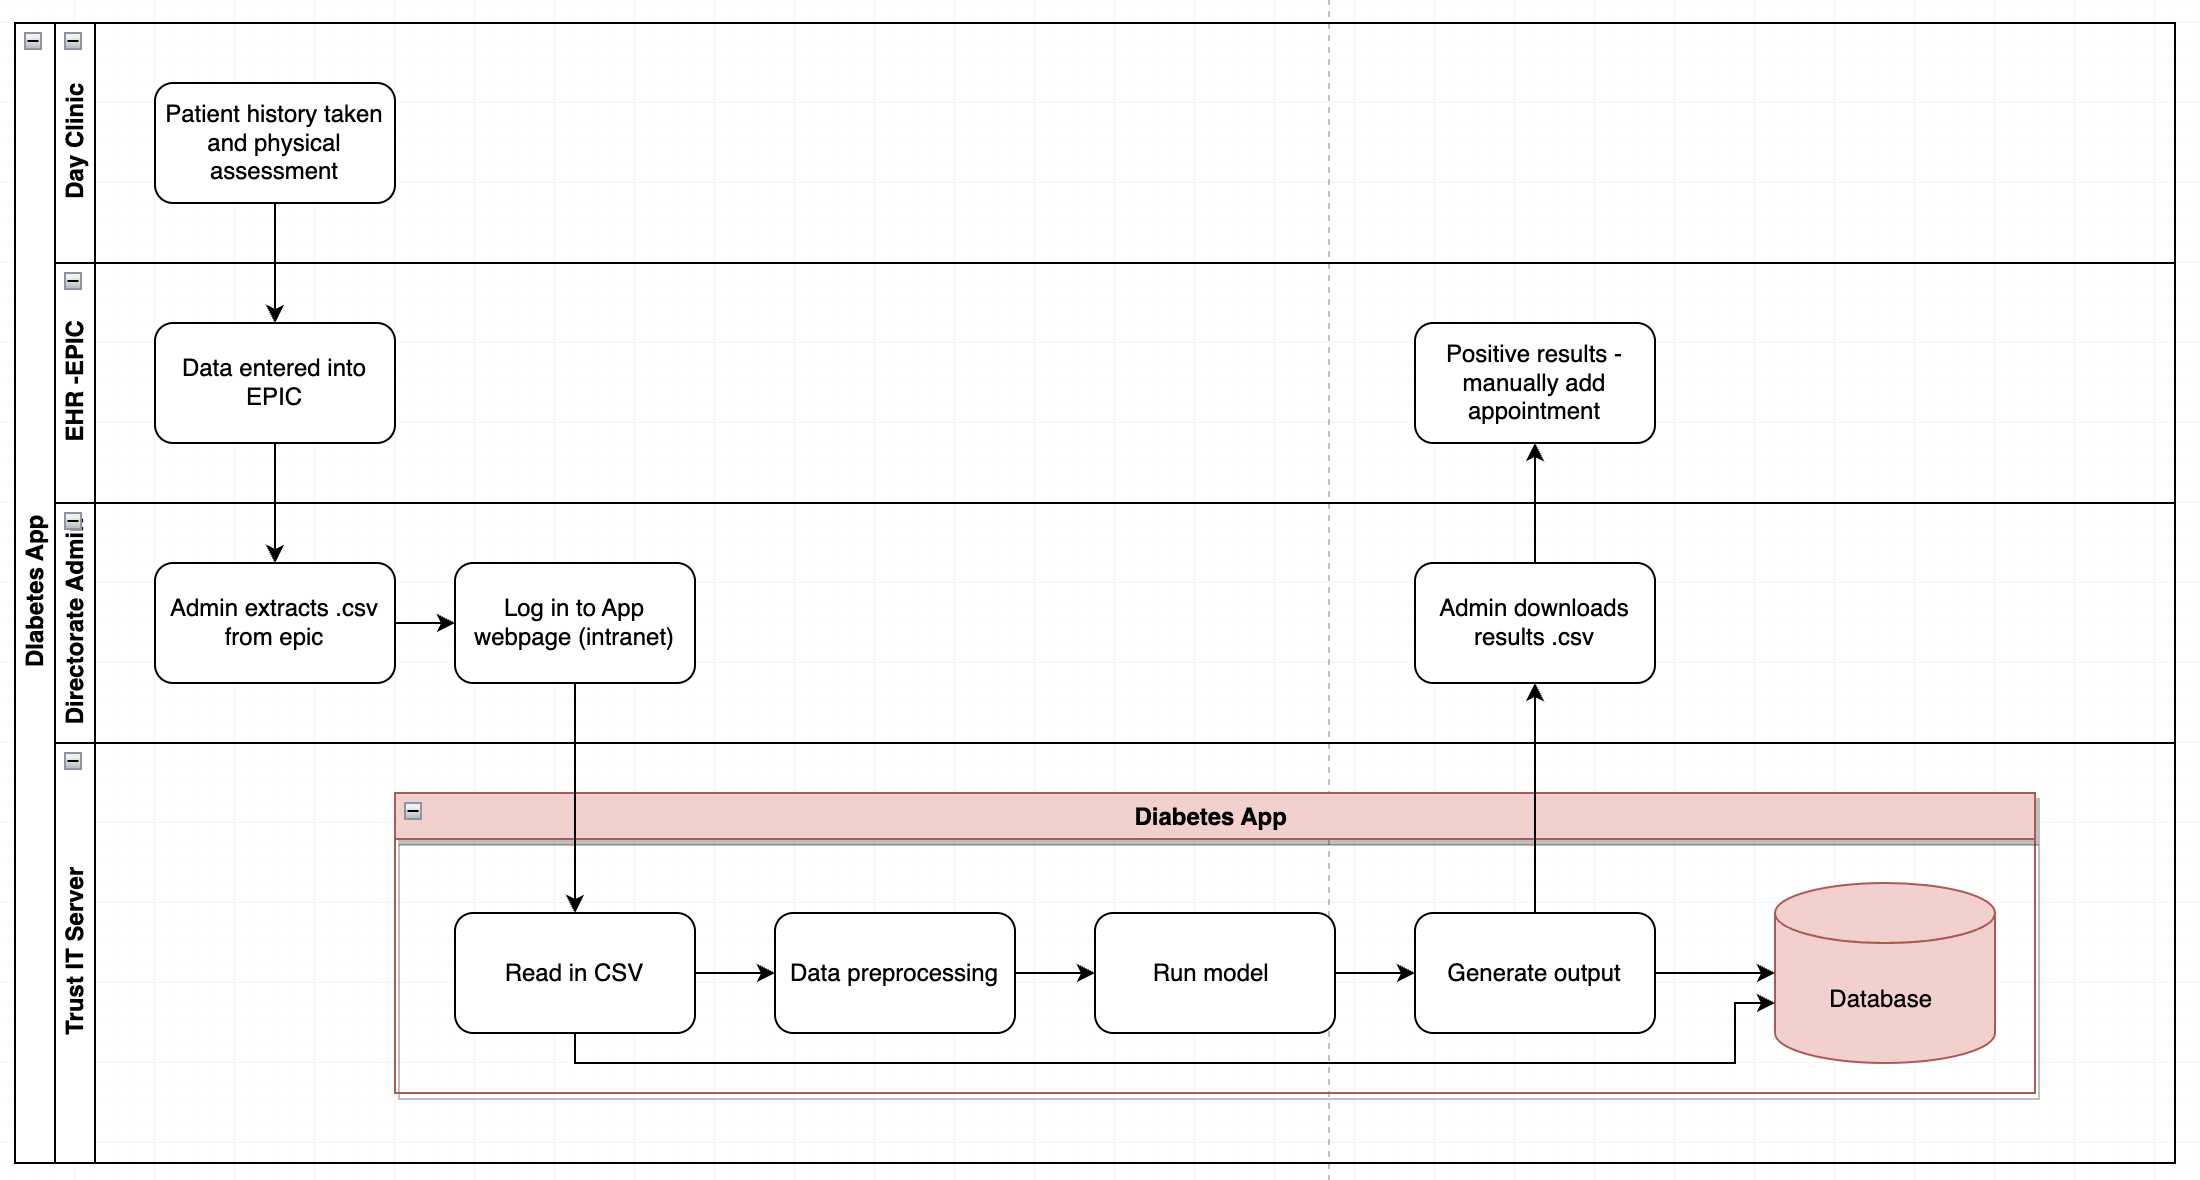

In [ ]:
from IPython.display import Image
Image(filename='day2_data/images/care_process_diagram.png')

# 1. Project Initiation

- Open the data/device.yml file and fill out the label
- Name your product
- Choose the version number
- Classify the medical device
- Open data/people.yml and assign roles


In [ ]:
# display the contents of the device yaml file.
with open("day2_data/data/device.yml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

print(yaml.dump(data_loaded, Dumper=MyDumper, default_flow_style=False))

BS62304_class: B
csc_website_url: null
github_url: null
mhra_class: IIb
name: DEVICE
name_sh: DEV
version: v1.0.0



In [ ]:

# Build the documentation using the command 'make'
! cd day2_data && make && cd ..


rdm render documents/acceptance-criteria.md config.yml data/definitions.yml data/device.yml data/history.yml data/integration_test_record.yml data/manual_tests.yml data/people.yml data/requirements.yml data/risk.yml data/soup.yml data/training_data.yml data/unit_test_record.yml data/versions.yml data/workflow.yml > release/acceptance-criteria.md
rdm render documents/clinical-risk-management-plan.md config.yml data/definitions.yml data/device.yml data/history.yml data/integration_test_record.yml data/manual_tests.yml data/people.yml data/requirements.yml data/risk.yml data/soup.yml data/training_data.yml data/unit_test_record.yml data/versions.yml data/workflow.yml > release/clinical-risk-management-plan.md
rdm render documents/clinical-safety-case-report.md config.yml data/definitions.yml data/device.yml data/history.yml data/integration_test_record.yml data/manual_tests.yml data/people.yml data/requirements.yml data/risk.yml data/soup.yml data/training_data.yml data/unit_test_record.y

# 2. Requirements gathering

Open the requirements yaml and add a new user requirement based off carer process diagram.
The first one has been done for you.

- Write a short title
- Write a short desciption
- Provide a ' Unique Identifier ' e.g. SRS_002 (System Requirement Specification)
- Add a requirement type

### Rules

- Clear, Concise, Unabiguous,
- MEASURABLE - Users will need to be able to prove it was implemented with a unit test.
- Not over-specific on how to achieve something, but about an expected function of the software.
- use the word MUST (not 'shall' which is too ambiguous...)



In [ ]:
# display the contents of the requirements yaml file.
with open("day2_data/data/requirements.yml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

print(yaml.dump(data_loaded, Dumper=MyDumper, default_flow_style=False))


requirements:
  - description: Must accept .csv files as the input.
    id: SRS-001
    linked_risk_control: None
    priority: v1
    title: Accepts .csv files
    type: Input/Output
  - description: Requirements describe what the software needs to do, and not how.
    id: SRS-002
    linked_risk_control: null
    priority: null
    title: Second Example Requirement
    type: Functional
  - description: Requirements should be verifiable (e.g., testable).
    id: SRS-003
    linked_risk_control: null
    priority: null
    title: Third Example Requirement
    type: Functional
  - description: Requirements can be written using markdown.
    id: SRS-004
    linked_risk_control: null
    priority: null
    title: Fourth Example Requirement
    type: Functional
sys_des_spec:
  - description: A function that accepts a filepath input, checks the file is a .csv
      file, and validates column names
    id: SDS-001
    linked_reqs: SRS-001
    title: Create a .csv upload function
  - descript

## 3. Design Specification

Open the requirements.yml file and fill out the design spec items (sys_des_spec).

Write a design specification item against the requirement you just added.

- Written with enough detail to implement the code correct.
- Should not go as far as to specificy python functions unless pertinenant to the requirement e.g. use the MONAI framework.
- Must be written in a way that can be verified by unit tests programatically.

In [ ]:
# display the contents of the requirements yaml file.
with open("day2_data/data/requirements.yml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

print(yaml.dump(data_loaded, Dumper=MyDumper, default_flow_style=False))

In [ ]:
def read_in_csv_to_dataframe(file_path:str) -> pd.DataFrame:

    """ Convert csv file input to a pandas dataframe
        Checks correct headings are present

        returns:
          DataFrame  """

    path = Path(file_path)
    if path.is_file and path.suffix == ".csv":
        df = pd.read_csv(file_path)
        print(df.columns.values)
        headings = ["Id", "Pregnancies", "Glucose","BloodPressure", "SkinThickness",
                     "Insulin", "BMI", "DiabetesPedigreeFunction","Age", "Outcome"]

        for val in headings:
            if val not in list(df.columns.values):
                raise KeyError(f'input csv has missing column: {val}')

        return df
    else:
        raise TypeError(f"Unable to process file {file_path}, not a csv")

data = read_in_csv_to_dataframe('day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes.csv')
print("\n\nSnippet of the data for processing:\n\n")
print(data.head)

# 4. Verification

Write a unit test in a thetest class that verifies the above function correct handles the an incorrect file type being upload, for instance a '.xlsx' file.

"Verification is that you've built the software right" e.g. as you said you would in the design spec.


In [ ]:
import ipytest

class TestCSVIngestion:
    def test_ingest_csv(self, record_property):
        """Reads in correct csv file, returns a data frame"""
        record_property("REQ", "SDS-001")

        test_csv_pass = 'day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes.csv'
        df = read_in_csv_to_dataframe(test_csv_pass)

        assert type(df) == pd.DataFrame

    def test_ingest_csv_incorrect_columns(self, record_property):
        """Incorrect columns, returns KeyError """
        record_property("REQ", "SDS-001")

        test_csv_fail = 'day2_data/test_data/Healthcare-Diabetes - Healthcare-Diabetes changed columns.csv'
        with pytest.raises(KeyError):
            df = read_in_csv_to_dataframe(test_csv_fail)

    def test_ingest_csv_wrong_filetype_SDS_001(self, record_property):
        """Returns TypeErrror from incorrect file format uploaded, eg .xlsx """
        record_property("REQ", "SDS-001")
        assert False

ipytest.autoconfig()
ipytest.run('-vv')

# 5. Validation

Add a manual validation test to the validation test file which would partially satisfy whether a requirement has been fulfilled.

"Validation is ensure you've built the right software" - ensures you software fulfills the user requirements

### Rules

- Can be perform manually by an end user (not necessrily the developer)
- Has a clearly defined output

In [ ]:
# display the contents of the requirements yaml file.
with open("day2_data/data/manual_tests.yml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

print(yaml.dump(data_loaded, Dumper=MyDumper, default_flow_style=False))

In [ ]:

# Build the documentation using the command 'make'
! cd day2_data && make && cd ..
